# Regularisation Preprocessing: Scaling Data for Regularisation

© Explore Data Science Academy

## Learning Objectives
In this train you will learn how to:

- Understand what scaling and standardisation are;
- Walk through the code required to implement data scaling.

## Outline

Within the sections of this train we will:

- Introduce data scaling;
- Implement data scaling in sklearn.

## Introducing Scaling

Scaling data is a critical to regularisation as the penalty on particular coefficients in regularisation techniques namely L1 and L2, depends largely on the scale associated with the variables. Regularisation puts constraints on the size of the coefficients related to each variable. Therefore, rescaling is very important for methods with regularisation because the size of the variables affects how much regularisation will be applied to that specific variable. So to make it fair, we need to get all the features on the same scale. 

There are two common scaling techniques: 

### Normalisation

One way to do this is with $[0,1]$-normalisation: squeezing your data into the range $[0,1]$. Through normalisation, the maximum value of a variable becomes one, the minimum becomes zero, and the values in-between become decimals between zero and one.

We implement this transformation by applying the following operation to each of the values of a predictor variable:

$$\hat{x}_{ij} = \frac{x_{ij}-min(x_j)}{max(x_j)-min(x_j)},$$

where $\hat{x}_{ij}$ is the value after normalisation, $x_{ij}$ is the $i^{th}$ item of $x_j$, and $min()$, $max()$ return the smallest and largest values of variable $x_j$ respectively. 

Normalisation is useful because it ensures all variables share the same range: $[0,1]$. One problem with normalisation, however, is that if there are outliers, the bulk of your data will all lie in a small range, so you would lose information.

### Standardisation

Z-score standardisation, or simply standardisation, on the other hand, does not suffer from this drawback as it handles outliers gracefully. 

We implement Z-score standardisation by applying the following operation to each of our variables: 

$$\hat{x}_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}.$$

Here, $\mu_j$ represents the mean of variable $x_j$, while $\sigma_j$ is the variable's standard deviation. As can be seen from the above formula, instead of dividing by the full range of our variable, we instead divide by a more distribution-aware measure in the standard deviation. While this doesn't completely remove the effects of outliers, it does consider them in a more conservative manner. As a trade-off to using this transformation, our variable is no longer contained within the $[0,1]$ range as it was during normalisation (in fact, it can now take on a range which includes negative values). This means that all our variables won't be bound to the exact same range (i.e. they can have slightly different influence levels on the learnt regression coefficients during regularisation), but they are far closer to one another then they were before the use of standardisation.

## Getting started

To begin, let's import a few Python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we'll load our data as a Pandas DataFrame after fetching it from the GitHub repo.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/regression_sprint_data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


We can take a look at the dimensions of the dataframe to get an idea of the number of rows, _n_, and number of predictors, _p_, which is equal to one less than the number of columns.

In [3]:
df.shape

(120, 20)

We will be using a dataset which contains monthly data for the Rand/Dollar exchange rate, as well as a few potential predictor variables. In this case, the goal is to try and model the exchange rate, using the other 19 variables.   

The way we write this is as follows:   

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$   

In this case, $Y$ is the reponse variable which depends on the _p_ predictor variables.

We can see in the data above that the variables have different scales. For example, we have many variables which are financial by nature and have values in the tens of thousands, whereas other variables are rates which are on a percentage scale. So let's go ahead and implement scaling. 

## Implementing Scaling

Let's see how we standardise the features. Sklearn makes rescaling easy. We'll import the `StandardScalar()` object from `sklearn.preprocessing`.

In [4]:
# split data into predictors and response
X = df.drop('ZAR/USD', axis=1)
y = df['ZAR/USD']

In [5]:
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [6]:
# create scaler object
scaler = StandardScaler()

In [7]:
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [8]:
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
0,-1.341230,-1.820002,0.205077,-1.124305,-2.145276,-0.740237,-2.040128,0.325086,-0.356166,2.195535,2.098427,2.225653,0.692028,2.036107,2.195535,-0.234691,2.625151,-1.613707,-1.690995
1,-0.934909,-1.404295,0.248319,-0.821735,-2.057421,-0.739864,-1.936778,2.106157,1.670410,2.195535,2.108767,2.136289,1.529205,2.124739,2.195535,0.294266,2.985518,-1.567326,-1.667091
2,-0.704734,-1.173995,0.130057,-0.751314,-1.992313,-0.739698,-1.861424,1.395422,0.836888,2.195535,2.124275,2.052883,1.536956,2.145593,2.195535,1.047628,3.209525,-1.498915,-1.604276
3,-0.074046,-0.898842,1.007391,-0.373843,-1.961339,-0.739781,-1.823519,1.195919,1.029628,2.452574,2.284533,2.106501,1.676486,2.270721,2.452574,1.031600,3.366412,-1.428184,-1.572591
4,0.055500,-0.895220,0.989217,-0.462633,-1.947106,-0.739490,-1.806486,1.665095,1.820496,2.452574,2.387925,2.303101,2.219101,2.328071,2.452574,1.608643,3.586510,-1.254644,-1.533123


Taking a look at one of the variables as an example (Value of Exports (USD)), we can see that standarizing the data has caused it to be centered around zero.

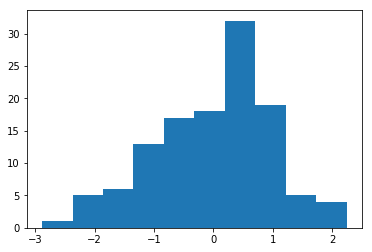

In [9]:
plt.hist(X_standardise['Value of Exports (USD)'])
plt.show()

Furthermore, the variance within each variable in the data is now equal to one. 

In [10]:
X_standardise.describe().loc['std']

Value of Exports (USD)                     1.004193
Value of Exports (ZAR)                     1.004193
Value of Imports (USD)                     1.004193
Value of Imports (ZAR)                     1.004193
Total Reserves excl Gold (USD)             1.004193
IMF Reserve Position (USD)                 1.004193
Foreign Exchange (USD)                     1.004193
Claims on Non-residents (USD)              1.004193
Liabilities to Non-residents (USD)         1.004193
Central Bank Policy Rate                   1.004193
Money Market Rate                          1.004193
Treasury Bill Rate                         1.004193
Savings Rate                               1.004193
Deposit Rate                               1.004193
Lending Rate                               1.004193
Government Bonds                           1.004193
Financial Market Prices, Equities Index    1.004193
Producer Price Index                       1.004193
Consumer Price Index                       1.004193
Name: std, d

## Conclusion

In this train we have seen or been introduced to:

- The difference between scaling and standardising the predictor variables in our dataset
- The different scaling techniques and performed scaling on our data using Standardization. 

## Appendix
Links to additional resources to help with the understanding of concepts presented in the train.

- [Article on standard min-max normalization vs z-score standardisation](https://www.codecademy.com/articles/normalization)